In [1]:
from sympy import *
from IPython.display import display, Latex
import numpy as np

In [2]:
x, theta, r = symbols("x, theta, r")
f = (1 + theta * x) / 2
F = integrate(f, (x, -1, x))
s = solve(F - r, x)
s[0]

(-sqrt(4*r*theta + theta**2 - 2*theta + 1) - 1)/theta

In [3]:
s0 = solve(F.subs(theta,0) -r, x)
s0[0]

2*r - 1

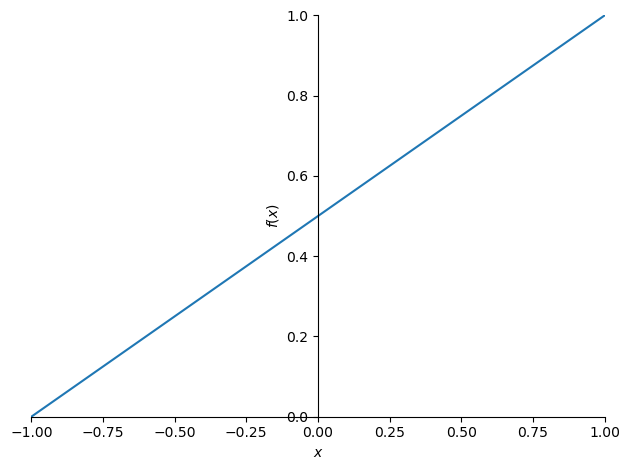

In [4]:
p1 = plot(F.subs(theta, 0), xlim=(-1,1), ylim=(0,1))

In [5]:
invF = Piecewise((s[0], theta<0), (s[0], theta>0), (s0[0], theta>=0))
invF

Piecewise(((-sqrt(4*r*theta + theta**2 - 2*theta + 1) - 1)/theta, (theta > 0) | (theta < 0)), (2*r - 1, True))

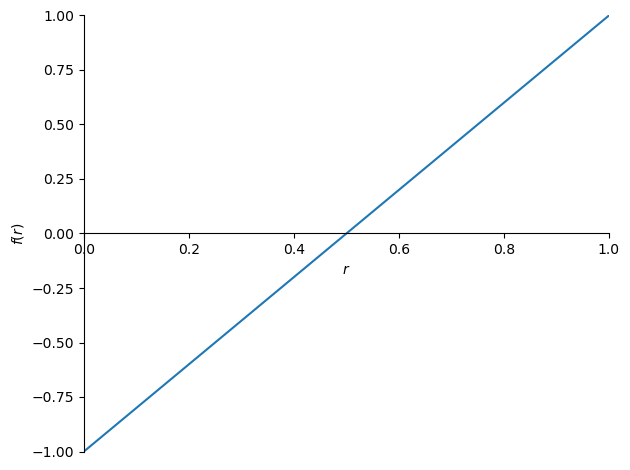

In [6]:
p2 = plot(invF.subs(theta,0.), xlim=(0,1), ylim=(-1,1))

In [7]:
n_samples = 1000
invFpy = lambdify(r, invF.subs(theta, 0.2))
rv = np.random.rand(n_samples)
data = invFpy(rv)
np.savetxt("ml_fit_data.csv", data)
